# 1.BUSINESS UNDERSTANDING

## 1.1 BUSINESS OVERVIEW

In today's society social media is widely used by people to express their opinion on different brands and products, which can influence other people opinion on the product which will lead to an impact on the company's reputation.

Social media platform such as Twitter has become an open space for people where they leave their opinion on their products, these tweets reveal how the customers feel about their products which will make the companies to understand their customers and improve their products to increase the customers satisfaction.

## 1.2 PROBLEM OVERVIEW

The social media platform is a good space for customers and companies to communicate, but it has greatly affected some companies due to negative reviews from customers.

Businesses need to understand their customers opinions, thus their many comments, and it will be difficult to analyze them all which is time consuming, but by solving this, companies can detect negative emotions early and respond quickly to protect their brand image.

This project uses natural language processing techniques to analyze and classify customer emotions toward brands and products.

## 1.3 BUSINESS UNDERSTANDING

### 1.3.1 MAIN OBJECTIVE

The goal of this project is to analyze customers views on Apple and Google products using NLP.

### 1.3.2 SPECIFIC OBJECTIVE

1.  Understand how people feel about Apple and Google products.
2.  To determine which brands have the most positive or negative emotional expressed.
3.  To analyze the common words used in positive and negative comments.
4.  To visualize the customers emotions in the brands.
5.  To clasify if a comment is positive, negative or neither



### 1.3.2 RESEARCH QUESTIONS

1. Which emotion is the most common in each brand and product.
2. Which brand receive the most positive, negative or neutral comment.
3. which tweet text is used in the positive, negative or neutral comment
4. If the Apple and Google product are loved or not.
5. If we can predict the outcome for each tweet text.

### 1.3.3 SUCCESS CRITERIA

Build an analysis model that would achieve a more precise prediction on the customers emotions and to visualize the customers feedback to see the trend in the comments.

# 2. DATA UNDERSTANDING

- The data was gotten from data.world(https://data.world/crowdflower/brands-and-product-emotions/workspace/file?filename=judge-1377884607_tweet_product_company.csv).
- It contains 3 columns and 9,093 rows.
- The dataset consists of strings such as customers comments, product or brand and customers emotions dated back in 2013
- The column names are:
 1. `Tweet text` - The customers comments.
 2. `Emotion_in_tweet_is_directed_at` - The brand or product mentioned in the text.
 3. `Is_there_an_emotion_directed_at_a_brand_or_product` - the customers emotion on the brand or product.

In [127]:
#Basic imports
import pandas as pd
import numpy as np
#Visualization imports

#Text cleaning imports

#Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#Model evaluation import
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#ML imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



In [128]:
#load data
df=pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='latin1')
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [129]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [130]:
#descriptive statistics
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [131]:
# Create numeric columns
df['tweet_length'] = df['tweet_text'].astype(str).apply(len)
df['word_count'] = df['tweet_text'].astype(str).apply(lambda x: len(x.split()))
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17


## 2.1 EDA

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

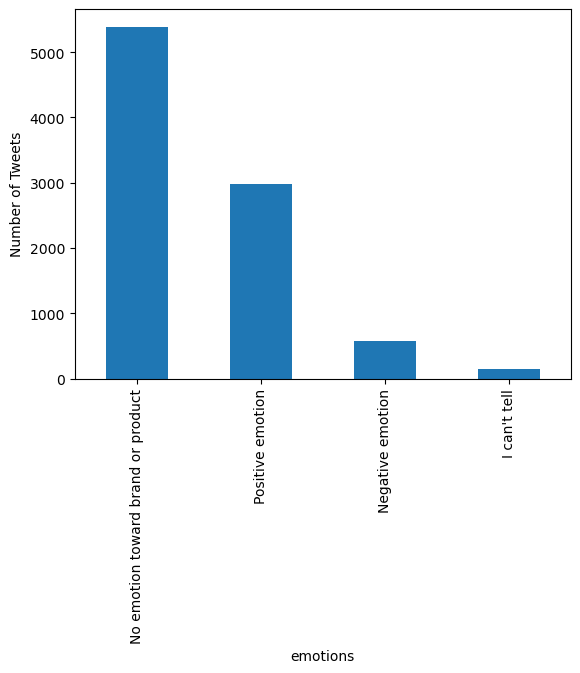

In [132]:
#Shows how many positive, negative and neutral emotion
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.xlabel('emotions')
plt.ylabel('Number of Tweets')
plt.show()

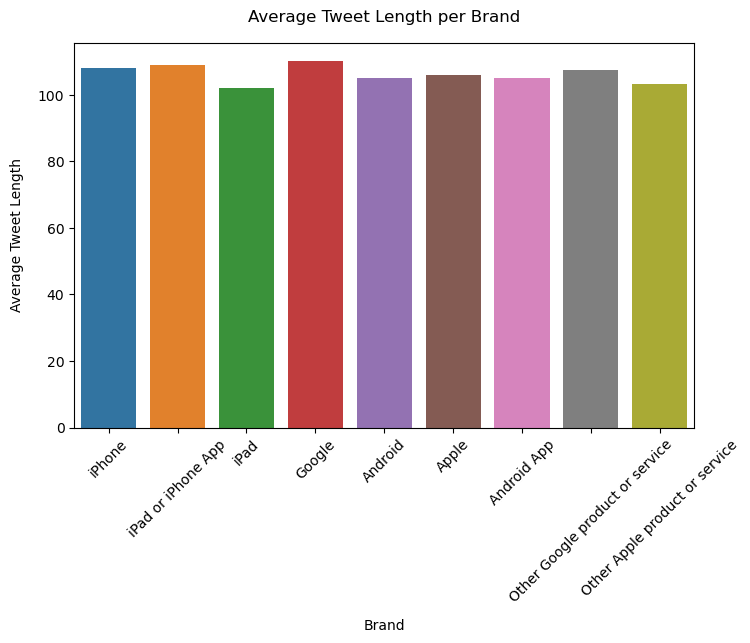

In [133]:
# compares average tweet length for each brand.
plt.figure(figsize=(8,5))
sns.barplot(
    x='emotion_in_tweet_is_directed_at',
    y='tweet_length',
    data=df,
    estimator='mean',
    errorbar=None
)
plt.title('Average Tweet Length per Brand', pad=15)
plt.xlabel('Brand', labelpad=10)
plt.ylabel('Average Tweet Length', labelpad=10)
plt.xticks(rotation=45)
plt.show()


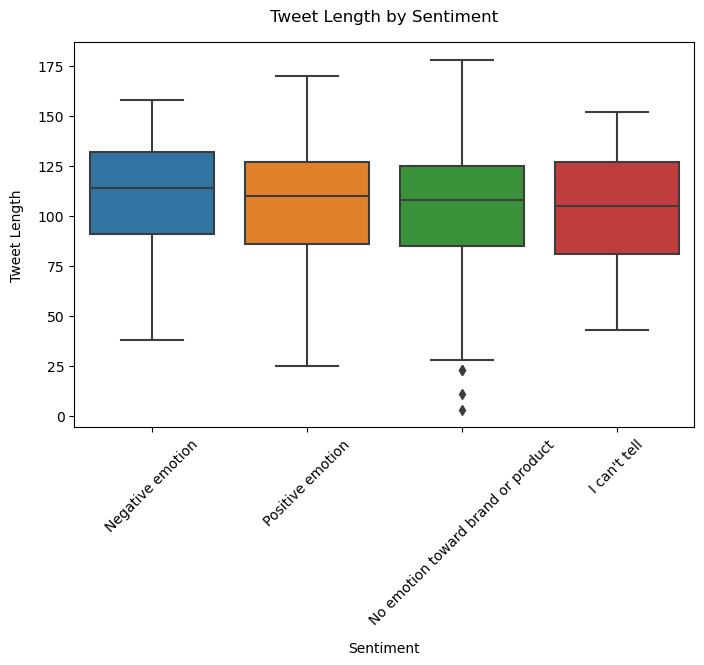

In [134]:
#Boxplot that shows distribution of tweet lengths by sentiment .
plt.figure(figsize=(8,5))
sns.boxplot(
    x='is_there_an_emotion_directed_at_a_brand_or_product',
    y='tweet_length',
    data=df
)
plt.title('Tweet Length by Sentiment', pad=15)
plt.xlabel('Sentiment', labelpad=10)
plt.ylabel('Tweet Length', labelpad=10)
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


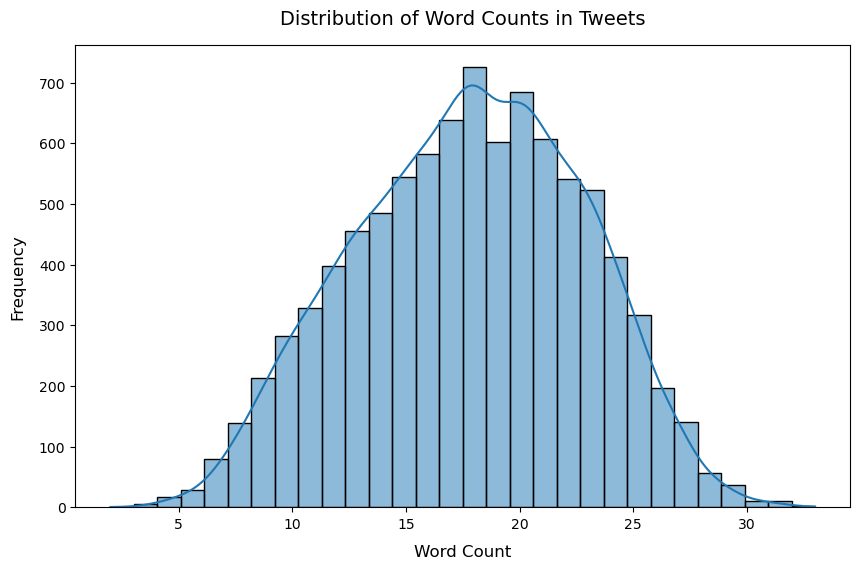

In [168]:
#shows how the number of words varies across all tweets.
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Tweets', fontsize=14, pad=15)
plt.xlabel('Word Count', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.show()


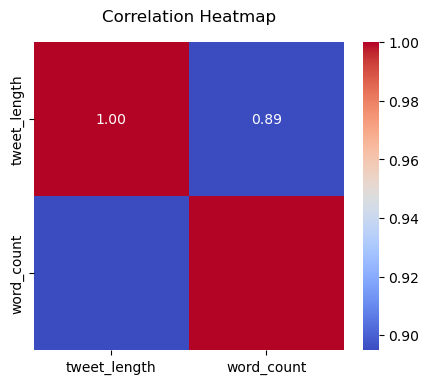

In [136]:
# shows reveals how numeric features are related. 
plt.figure(figsize=(5,4))
sns.heatmap(
    df[['tweet_length', 'word_count']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap', pad=15)
plt.show()


# 3. DATA PREPARATION

In [137]:
#Checking duplicates
df.duplicated().sum()


22

In [138]:
#remove duplicates
df.drop_duplicates(subset=['tweet_text'],inplace=True)

In [139]:
#checking missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5786
is_there_an_emotion_directed_at_a_brand_or_product       0
tweet_length                                             0
word_count                                               0
dtype: int64

In [165]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [140]:
# Drop rows with missing text
df.dropna(subset=['tweet_text'], inplace=True)

In [141]:
#Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [142]:
#Clean text
def clean_text(text):
#Remove urls, hashtags, mentions, numbers, punctuation
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"@\w+|#\w+", "", text)  
    text = re.sub(r"[^a-zA-Z\s]", "", text) 

    #Convert to lowercase
    text = text.lower()  

    #Handle extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    #Tokenize
    tokens = word_tokenize(text)

    #Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join back into string          
    cleaned_text= " ".join(tokens)
    
    return cleaned_text

In [143]:
#apply text cleaning
df['clean_text'] = df['tweet_text'].astype(str).apply(clean_text)

In [144]:
#Check results
print(df[['tweet_text', 'clean_text']].head(10))

                                           tweet_text  \
0   .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1   @jessedee Know about @fludapp ? Awesome iPad/i...   
2   @swonderlin Can not wait for #iPad 2 also. The...   
3   @sxsw I hope this year's festival isn't as cra...   
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5   @teachntech00 New iPad Apps For #SpeechTherapy...   
7   #SXSW is just starting, #CTIA is around the co...   
8   Beautifully smart and simple idea RT @madebyma...   
9   Counting down the days to #sxsw plus strong Ca...   
10  Excited to meet the @samsungmobileus at #sxsw ...   

                                           clean_text  
0   g iphone hr tweeting dead need upgrade plugin ...  
1   know awesome ipadiphone app youll likely appre...  
2                                      wait also sale  
3      hope year festival isnt crashy year iphone app  
4   great stuff fri marissa mayer google tim oreil...  
5    new ipad apps communication sho

In [145]:
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
# Fit on clean text and transform into numeric array
X_tfidf = tfidf.fit_transform(df['clean_text'])

In [146]:
#Attach target column for modeling
final_df = pd.concat(
    [tfidf_df, df['is_there_an_emotion_directed_at_a_brand_or_product']],
    axis=1
)
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,great stuff fri marissa mayer google tim oreil...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,140,18,new ipad apps communication showcased conference
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,138,28,starting around corner hop skip jump good time...
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,129,17,beautifully smart simple idea rt wrote ipad app
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,88,16,counting day plus strong canadian dollar mean ...
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,118,21,excited meet show sprint galaxy still running ...


In [147]:
#Train split test
X = tfidf_df
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. MODELING**

In [148]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [149]:
#Drop rows with missing sentiment
df = df.dropna(subset=['is_there_an_emotion_directed_at_a_brand_or_product'])

In [150]:
# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])